In [1]:
using AutomotiveDrivingModels
"loading modules"

"loading modules"

# Rendering

In [2]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "Renderer.jl")); using .Renderer
include(Pkg.dir("AutomotiveDrivingModels", "viz", "ColorScheme.jl")); using .ColorScheme

In [3]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "incl_cairo_utils.jl"))
# reload("/home/tim/Documents/wheelerworkspace/Bosch/viz/incl_pyplot_utils.jl")

  likely near /home/tim/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/tim/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/MacroTools/src/utils.jl:108
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/tim/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/tim/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/tim/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1
  likely near /home/tim/.

# Select Street Network

In [4]:
const STREETMAP_DIR = "/media/tim/DATAPART1/Data/Bosch/processed/streetmaps"
streetmap_files = filter(readdir(STREETMAP_DIR)) do content
    path = joinpath(STREETMAP_DIR,content)
    isfile(path) && endswith(content, ".jld")
end
println("available streetnetworks:")
streetmap_files

available streetnetworks:


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/MacroTools/src/utils.jl:108
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/tim/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/tim/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/tim/.julia/v0.4/Reel/src/Reel.jl, in expression starting on line 85
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/MacroTools/src/utils.jl:108
 in include at ./boot.jl

12-element Array{ByteString,1}:
 "streetmap_280N_big.jld"                  
 "streetmap_280_pagemill_to_92.jld"        
 "streetmap_280_pagemill_to_92_old.jld"    
 "streetmap_280S_big.jld"                  
 "streetmap_circuit_2lane.jld"             
 "streetmap_detroit_v4.jld"                
 "streetmap_highway_1lane.jld"             
 "streetmap_highway_2lane.jld"             
 "streetmap_highway_3lane.jld"             
 "streetmap_highway_4lane.jld"             
 "streetmap_its_both_loops_v3_smoothed.jld"
 "streetmap_its_inner_loop_v1_2.jld"       

In [5]:
streetmapfile = streetmap_files[4]
sn = JLD.load(joinpath(STREETMAP_DIR,streetmapfile), "streetmap");

In [6]:
const CSVFILESETS = (
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/philippruns_20150324/philippdrive01_2015-03-24-15-21-12-raw.csv",
                "280_pagemill_to_92", # 16
                [128,297,475,673,3520,3671,4363,4559,5724,5833,6816,6937,7086,7343,7650,7765,8102,8283,8826,9333,9922,10095],
                [2641,2833,3790,3981,5026,5255,10184,10321],
                [9816,9921],
                [1,127,298,475,1900,2293,5256,5723,6466,6815,6938,7085,7343,7649,7766,8101,8754,8825],
                [674,1899,2294,2641,2834,3519,3672,3789,3982,4363,4560,5025,5834,6465,8284,8753,9334,9815,10096,10183]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/philippruns_20150324/philippdrive03_2015-03-24-15-37-18-raw.csv",
                "280_pagemill_to_92", # 16
                [1182,1386,1425,1562,1657,1826,3331,3568,4929,5238,5691,5840,5899,6112,7913,8040,8407,8532],
                [3191,3330,3785,3974,4027,4212,6275,6778,8111,8278],
                [7712,7888,8533,8722],
                [1387,1424,5239,5690,5841,5898,7889,7912,9055,9160],
                [1,1182,1563,1656,1827,3190,3569,3784,3975,4026,4213,4928,6113,6274,8041,8110,8279,8406,8723,9054]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/philippruns_20150324/philippdrive04_2015-03-24-15-47-10-raw.csv",
                "280_pagemill_to_92", # 2
                [811,944,945,1148],
                Int[],
                Int[],
                Int[],
                [1,810]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/philippruns_20150324/philippdrive05_2015-03-24-15-48-42-raw.csv",
                "280_pagemill_to_92", # 5
                [149,314,628,934,1571,1683,2819,3032,3107,3308],
                Int[],
                Int[],
                [1,148,935,1570,1684,2818,3033,3106,3309,4434],
                [315,626]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/philippruns_20150324/philippdrive07_2015-03-24-15-57-42-raw.csv",
                "280_pagemill_to_92", # 12
                [31,138,965,1176,1481,1668,2753,2936,4135,4350,4351,4530,4672,4880,5271,5516,5856,6026,6195,6412,7775,7938,8519,8608],
                Int[],
                [6989,7156],
                [481,964,1177,1480,1669,2752,2937,4134,4531,4672,4999,5156,7157,7774,7939,8518],
                [1,30,139,480,4881,4998,5157,5270,5517,5856,6027,6194,6413,6988]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/source2/2014-08-03-12-01-09-edited.csv",
                "its_inner_loop_v1_2", # 2
                Int[],
                Int[],
                [4372,4482,4831,4976],
                [417,4266],
                [1,416,4483,4830,4977,5900]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/source2/2014-08-03-11-52-58-raw.csv",
                "its_inner_loop_v1_2",
                Int[],
                Int[],
                [1,153,359,518],
                [1101,1700],
                [154,358,519,1100,2494,3940]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/source2/2014-08-03-12-12-53-raw.csv",
                "its_inner_loop_v1_2",
                Int[],
                Int[],
                [1740,1892],
                [956,1348],
                [1624,1739,1893,3060]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/source2/2014-08-03-12-16-14-raw.csv",
                "its_both_loops_v3_smoothed",
                Int[],
                Int[],
                Int[],
                [2477,3918],
                [1,1020,1540,1936,2120,2476]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/source2/2014-08-03-12-20-36-raw.csv",
                "its_inner_loop_v1_2",
                Int[],
                Int[],
                [2733,2898],
                [68,2100],
                [2506,2732,2899,3292]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/source2/2014-08-03-12-54-24-raw.csv",
                "its_inner_loop_v1_2",
                Int[],
                Int[],
                Int[],
                [3166,3534,3972,6272,6448,7678,8036,8228,9031,9262],
                [8235,8500,8730,9030]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/source2/2014-08-06-16-11-51_large_loop_3-raw.csv",
                "detroit_v4",
                Int[],
                Int[],
                Int[],
                Int[],
                [1,1618,1642,1834,1844,1902,3810,4232,6618,8588]
                ),
            CSVFileSet(RunLogs.ID_EGO,
                "/media/tim/DATAPART1/Data/Bosch/source4/2015-02-05-14-03-40_driving_style_data_martin-raw.csv",
                "280_pagemill_to_92",
                Int[553,682,2636,2821], # lanechange normal
                Int[762,915,4717,4926], # lanechanges postpass
                Int[1599,1716,2340,2549,3472,3611,4455,4611], # lanechanges arbitrary
                Int[2550,2635], # car follow
                Int[41,553,683,761,916,1598,1717,2339,2822,3471,3612,4454,4612,4716,4927,8838], # free flow
                ),
        );

In [7]:
# Find positions and orientations in similar locations

pos_target = UTM(568081.349152404, 4142344.03219775, 76.6891996048, 10) # frame 2261 from Philipp Drive
v_target = convert(VecE3, pos_target)

foundit = Tuple{UTM, Quat}[]
for csvfileset in CSVFILESETS
    filepath = csvfileset.csvfile
    df = PrimaryDataExtractor.load_trajdata(filepath)
    
    for i in 1 : nrow(df)
        pos = UTM(df[i, :posGx], df[i, :posGy], df[i, :posGz], 10) # TODO(tim): remove default zone of 10
        v_pos = convert(VecE3, pos)
        
        delta = abs(v_pos - v_target)
        
        if delta < 10.0
            quat = Quat(df[i, :quatx], df[i, :quaty], df[i, :quatz], df[i, :quatw])
            push!(foundit, (pos, quat))
            
            RPY_pred = convert(RPY, quat)
#             @printf("RPY_pred:   %6.2f %6.2f %6.2f\n", rad2deg(RPY_pred.r), rad2deg(RPY_pred.p), rad2deg(RPY_pred.y))
#             println(quat)
            println(get_axis(quat), "  ", rad2deg(get_rotation_angle(quat)))
        end
    end
end

quat_target = Quat(0.453355129, 0.0545043841, -0.5369004224, 0.7093915244)
RPY_target = convert(RPY, quat_target)
# @printf("RPY_target: %6.2f %6.2f %6.2f\n", rad2deg(RPY_target.r), rad2deg(RPY_target.p), rad2deg(RPY_target.y))
println(quat_target)
nothing

VecE3(-0.001, 0.022, -1.000)  43.63992671486595
VecE3(-0.001, 0.023, -1.000)  43.621005921875266
VecE3(-0.002, 0.024, -1.000)  43.58691920282739
VecE3(-0.002, 0.023, -1.000)  43.55922963272883
VecE3(-0.004, 0.023, -1.000)  43.53392696421214
VecE3(-0.005, 0.024, -1.000)  43.49221664120263
VecE3(-0.005, 0.023, -1.000)  43.456619707531424
VecE3(-0.006, 0.023, -1.000)  43.428319968206615
VecE3(-0.006, 0.022, -1.000)  43.382645109507074
VecE3(-0.005, 0.020, -1.000)  43.31759523155158
VecE3(-0.006, 0.024, -1.000)  42.97983575068498
VecE3(-0.007, 0.024, -1.000)  42.965652301674176
VecE3(-0.007, 0.025, -1.000)  42.96326163680043
VecE3(-0.007, 0.025, -1.000)  42.95525712407555
VecE3(-0.007, 0.025, -1.000)  42.951923976346364
VecE3(-0.005, 0.024, -1.000)  42.93530946270506
VecE3(-0.007, 0.023, -1.000)  42.928131275519085
VecE3(-0.006, 0.024, -1.000)  42.915554757548115
VecE3(-0.006, 0.023, -1.000)  42.90831241302274
VecE3(-0.006, 0.022, -1.000)  42.88848122424308
VecE3(-

In [8]:
println(get_axis(quat_target), "  ", rad2deg(get_rotation_angle(quat_target)))

In [9]:
v = norm(VecE3(-2704769.13,  -4290028.69,   3855039.68))

VecE3(-0.425, -0.673, 0.605)

0.001, -0.001, 1.000)  317.1916499463834
VecE3(-0.001, -0.002, 1.000)  317.224208938317
VecE3(0.001, -0.002, 1.000)  317.2494010125206
VecE3(0.001, -0.002, 1.000)  317.2566452707635
VecE3(0.003, -0.002, 1.000)  317.24427403022685
VecE3(0.003, -0.002, 1.000)  317.22345621418805
VecE3(0.003, -0.002, 1.000)  317.234194221585
VecE3(0.003, -0.002, 1.000)  317.23956909600463
VecE3(0.003, -0.001, 1.000)  317.2462050088185
VecE3(0.002, -0.001, 1.000)  317.2228811297024
QUAT({ 0.453,  0.055, -0.537},  0.709)
VecE3(0.643, 0.077, -0.762)  89.62914074977692


# Select CSV File

In [10]:
csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source4/2015-02-05-14-03-40_driving_style_data_martin-raw.csv";
csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-14-15-04-57_92_to_pagemill_manual_drive_planning_stripped-raw.csv";

In [11]:
trajdata = PrimaryDataExtractor.load_trajdata(csv_filepath)
extract_params = PrimaryDataExtractionParams()
"done"

"done"

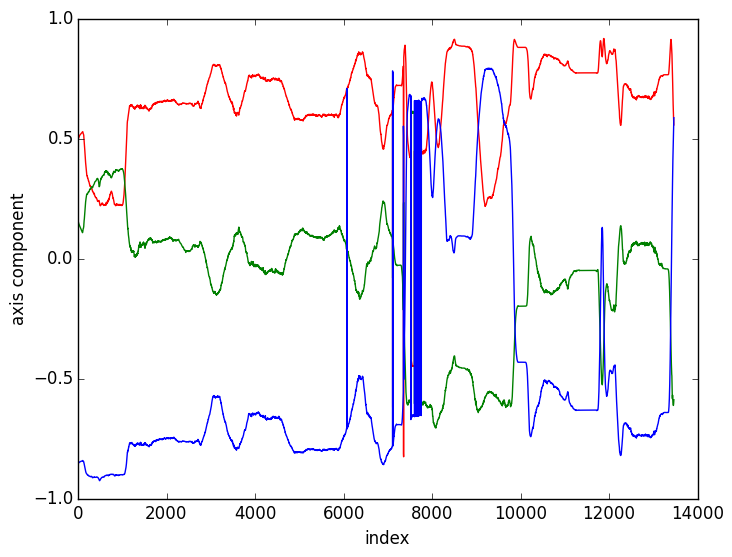

PyObject <matplotlib.text.Text object at 0x7f6765805cd0>

In [14]:
using PyPlot

x_arr = Array(Float64, nrow(trajdata))
y_arr = Array(Float64, nrow(trajdata))
z_arr = Array(Float64, nrow(trajdata))

for i in 1 : nrow(trajdata)
    quat = Quat(trajdata[i, :quatx], trajdata[i, :quaty], trajdata[i, :quatz], trajdata[i, :quatw])
    axis = get_axis(quat)
    x_arr[i] = axis.x
    y_arr[i] = axis.y
    z_arr[i] = axis.z
end

fig = figure(facecolor="white")
ax = fig[:add_subplot](111)
pts = collect(1:nrow(trajdata))
ax[:plot](pts, x_arr, "r")
ax[:plot](pts, y_arr, "g")
ax[:plot](pts, z_arr, "b")
ax[:set_xlabel]("index")
ax[:set_ylabel]("axis component")

In [15]:
# given position POS_UTM in utm and orientation QUAT_ENU, find QUAT_UTM

# frame 2261
POS_UTM = UTM(568081.349152404, 4142344.03219775, 76.6891996048, 10)
QUAT_ENU = Quat(0.453355129, 0.0545043841, -0.5369004224, 0.7093915244)

# POS_UTM = UTM(566438.818354506, 4143973.75845984, 118.2959519131, 10)
# QUAT_ENU = Quat(0.0163264606, 0.0019313033, 0.9295760474, 0.3682636133)

# POS_UTM = UTM(572154.504482796, 4139843.99346968, 93.6688633719, 10)
# QUAT_ENU = Quat(-0.0036787318, 0.0149555222, 0.9044303101, 0.4263433047)

# find a forward-point in ECEF
# find pos in ECEF
# convert it to UTM
# find orientation in UTM

R = convert(Matrix{Float64}, QUAT_ENU)
fp_enu = VecE3(R * [10.0,0.0,0.0])

# fp_enu = get_axis(QUAT_ENU)*10.0

POS_LLA = convert(LatLonAlt, POS_UTM)
FP_ENU = ENU(fp_enu.x, fp_enu.y, fp_enu.z)
FP_ENU = ENU(FP_ENU.e, FP_ENU.n, FP_ENU.u) #  + get_Earth_radius(POS_LLA.lat, POS_LLA.lon)
@printf("FP_ENU: %8.3f %8.3f %8.3f\n", FP_ENU.e, FP_ENU.n, FP_ENU.u)

# POS_ENU = ENU(0.0, 0.0, get_Earth_radius(POS_LLA.lat, POS_LLA.lon))
# @printf("POS_ENU:%8.3f %8.3f %8.3f\n", POS_ENU.e, POS_ENU.n, POS_ENU.u)

FP_ECEF = convert(ECEF, FP_ENU, POS_LLA)
@printf("FP_ECEF: %12.2f %12.2f %12.2f\n", FP_ECEF.x, FP_ECEF.y, FP_ECEF.z)

POS_ECEF = convert(ECEF, POS_LLA) # WORKS
@printf("POS_ECEF:%12.2f %12.2f %12.2f\n", POS_ECEF.x, POS_ECEF.y, POS_ECEF.z)

FP_LLA = convert(LatLonAlt, FP_ECEF)
println("FP_LLA:  ", FP_LLA, "  What we want to be correct")
println("POS_LLA: ", POS_LLA, "  The Correct One")

FP_UTM = convert(UTM, FP_LLA)
@printf("FP_UTM:  %12.2f %12.2f %12.2f\n", FP_UTM.e, FP_UTM.n, FP_UTM.u)
@printf("POS_UTM: %12.2f %12.2f %12.2f\n", POS_UTM.e, POS_UTM.n, POS_UTM.u)

AXIS_UTM = FP_UTM - POS_UTM
@printf("AXIS_UTM: %5.2f %5.2f %5.2f\n", AXIS_UTM.e, AXIS_UTM.n, AXIS_UTM.u)

yaw = atan2(AXIS_UTM.n, AXIS_UTM.e)
@printf("YAW: %.2f\n", rad2deg(yaw))

# predicted yaw:
RPY_pred = convert(RPY, QUAT_ENU)
@printf("RPY_pred: %5.2f %5.2f %5.2f\n", rad2deg(RPY_pred.r), rad2deg(RPY_pred.p), rad2deg(RPY_pred.y))

FP_ENU:    4.175   -7.123   -5.641
FP_ECEF:  -2704765.52  -4290030.79   3855030.60
POS_ECEF: -2704769.13  -4290028.69   3855039.68
FP_LLA:   37.43 -122.23      71.05  What we want to be correct
POS_LLA:  37.43 -122.23      76.69  The Correct One
FP_UTM:     568085.58   4142336.95        71.05
POS_UTM:    568081.35   4142344.03        76.69
AXIS_UTM:  4.23 -7.09 -5.64
YAW: -59.16
RPY_pred: 45.08 24.17 -59.62


In [9]:
trajdata[2261, :yawG]

-1.0328900590619763

Interact.Slider{Int64}([Reactive.Input{Int64}] 6728,"frame",6728,1:13456)

.43 -122.23      71.05  What we want to be correct
POS_LLA:  37.43 -122.23      76.69  The Correct One
FP_UTM:     568085.58   4142336.95        71.05
POS_UTM:    568081.35   4142344.03        76.69
AXIS_UTM:  4.23 -7.09 -5.64
YAW: -59.16
RPY_pred: 45.08 24.17 -59.62


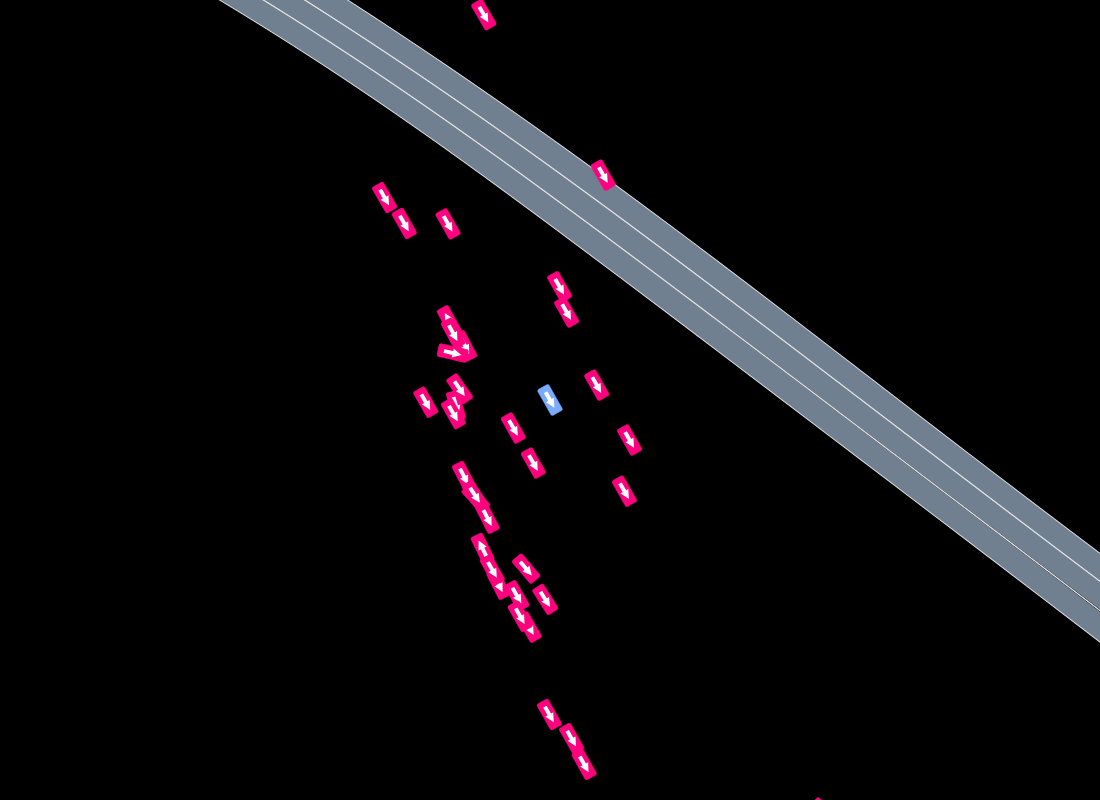

In [10]:
plot_manipulable_trajdata(trajdata, sn, canvas_height=800)

In [9]:
tic()
runlogs = extract_runlogs(trajdata, sn, extract_params, RunLogHeader(streetmapfile, "???"))
toc()
"done"

elapsed time: 102

"done"

In [9]:
#pdset = gen_primary_data(trajdata, sn, extract_params)
#"extracted pdset"

Interact.Slider{Int64}([Reactive.Input{Int64}] 4446,"frame",4446,1:8892)

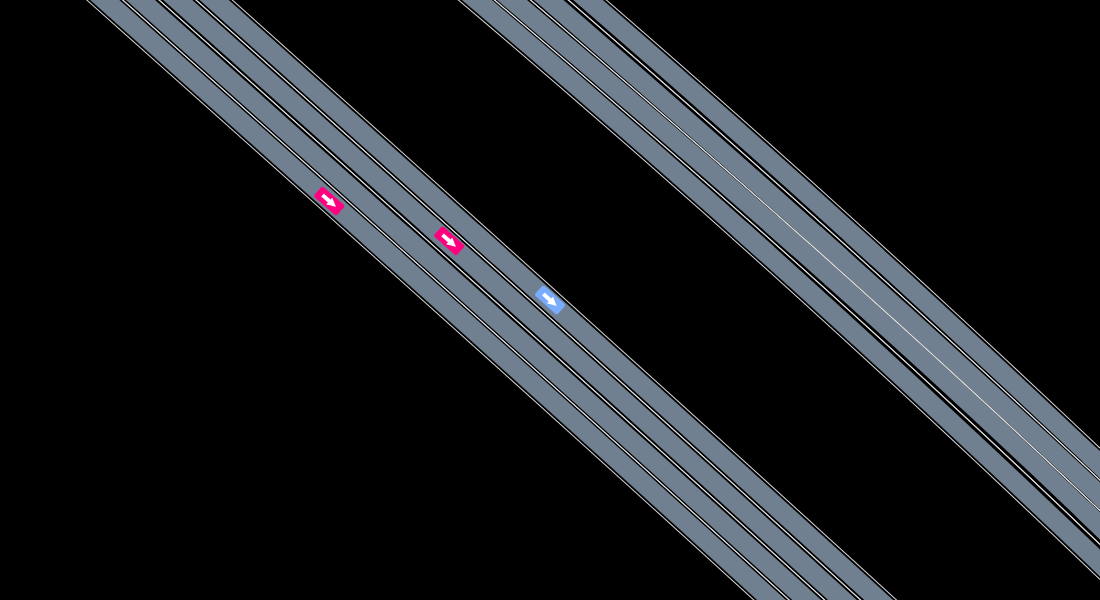

.146284685 seconds
behavior for each vehicle: 
elapsed time: 3.476e-6 seconds
elapsed time: 107.994598464 seconds


In [10]:
plot_manipulable_runlog(runlogs[1], sn, RunLogs.ID_EGO, canvas_height=600)

Interact.Slider{Int64}([Reactive.Input{Int64}] 4446,"frame",4446,1:8892)

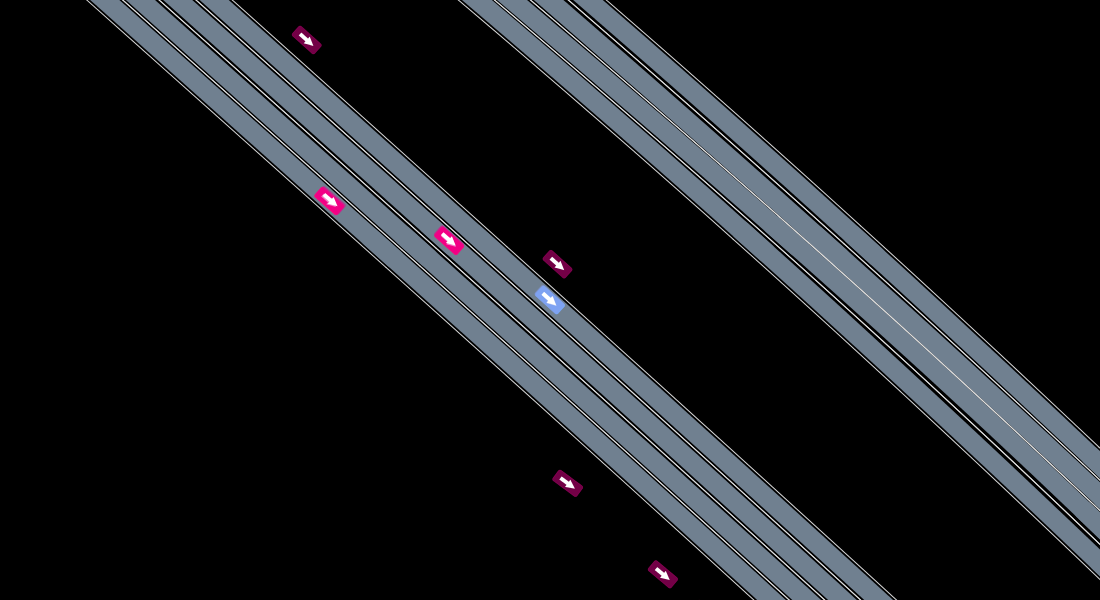

In [11]:
plot_manipulable_runlog_overlay_trajdata(runlogs[1], trajdata, sn, RunLogs.ID_EGO, canvas_height=600)

In [12]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "incl_cairo_utils.jl"))
plot_manipulable_runlog_and_front_rear(runlogs[1], sn, RunLogs.ID_EGO, canvas_height=600)

Interact.Slider{Int64}([Reactive.Input{Int64}] 4446,"frame",4446,1:8892)

LoadError: LoadError: KeyError: idfront not found
while loading In[12], in expression starting on line 2

Interact.Slider{Int64}([Reactive.Input{Int64}] 4446,"frame",4446,1:8892)

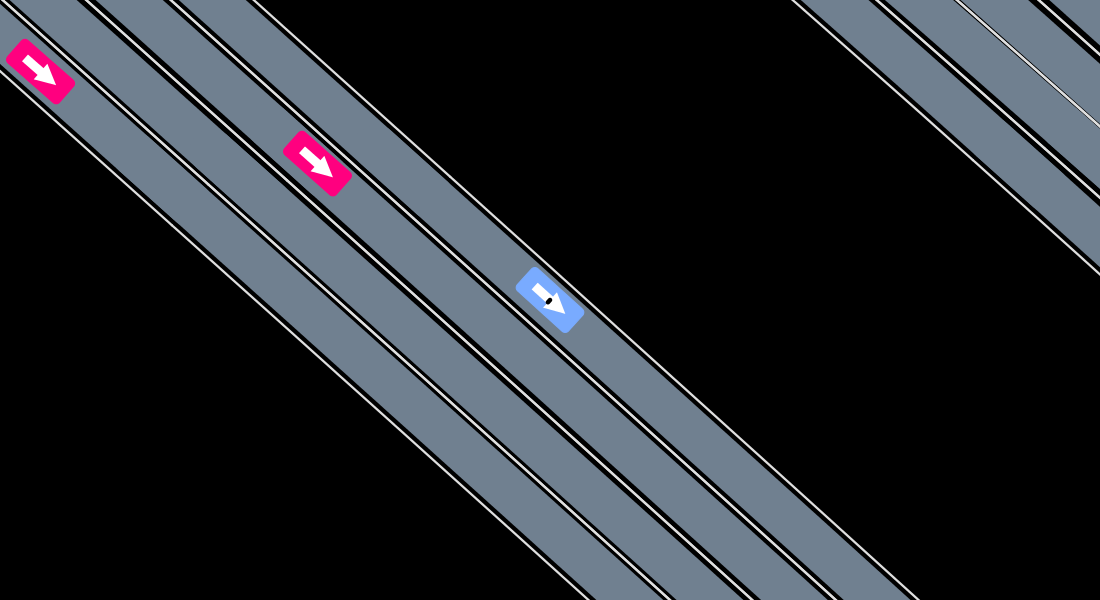

In [13]:
plot_manipulable_runlog_and_footpoint(runlogs[1], sn, RunLogs.ID_EGO, canvas_height=600)